#### Options Pricing via Monte Carlo Simulation

The following code will calculate the price of a European Call and Put Option using the Monte Carlo Simulation Method.
This method utilises the law of large numbers.
The intrinsic value of a Call and Put option is the current value (time adjusted value) value of the expected payoff of the option. The expected payoff of the option can be estimated using the empirical mean. We know that this is a good (consistent) estimator of the expected value as this follows from the Law of Large numbers.

The Monte Carlo Method is as follows:

1. Simulate the stock price many times.

2. Take the payoff of the options at each of these simulated values.

3. Calculate the mean of the payoffs as an estimate of the expected payoff.

4. Discount the mean to the current day. 

Thus we find a value for the option.  

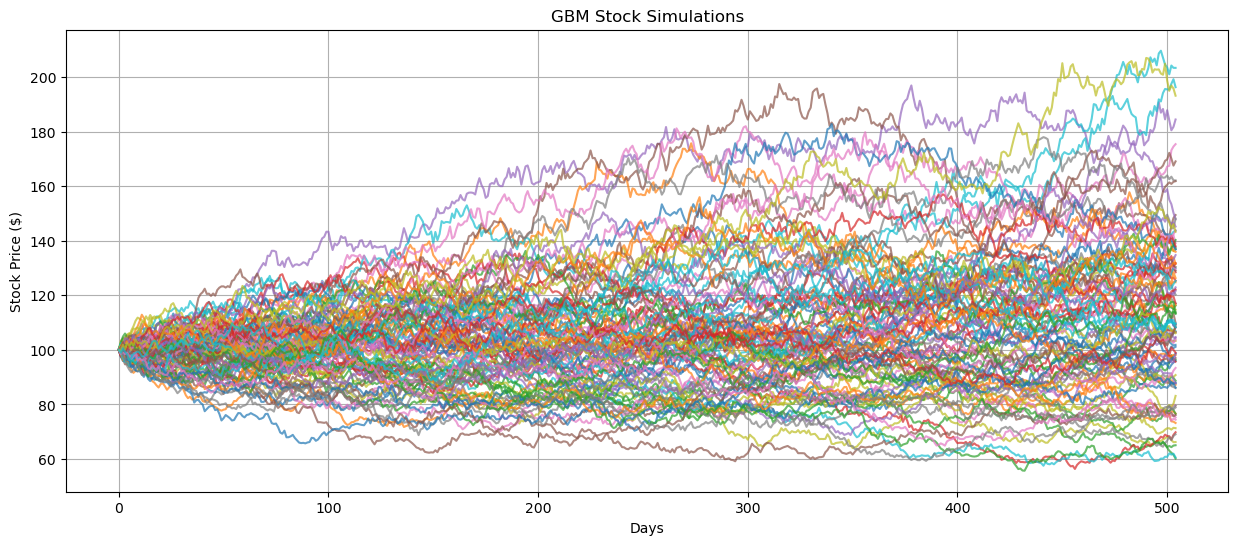

In [1]:
import numpy as np
from statistics import NormalDist as N
import math
import matplotlib.pyplot as plt


def stock_sims2(S,mu,sigma,t,num_sims,plot = True):
    dt = 1/252
    num_steps = int(t/dt)

    rand = np.random.normal(0,1,(num_sims,num_steps))

    drift = (mu-0.5*sigma**2)*dt                # a float value
    diffusion = sigma * np.sqrt(dt) * rand      # a numpy array

    log_returns = drift+diffusion               # the addition 'broadcasts' the float to each element of the array

    paths = np.zeros((num_sims, num_steps + 1)) 

    paths[:,0] = S
    paths[:,1:] = S * np.exp(np.cumsum(log_returns,axis=1))     #np.exp 'broadcasts exp to each individual cell of the array

    if plot:
        plt.figure(figsize = (15,6))

        for path in paths:
            plt.plot(path, alpha = 0.7)
        plt.title('GBM Stock Simulations')
        plt.xlabel('Days')
        plt.ylabel('Stock Price ($)')
        plt.grid(True)
    
    return(paths)


paths = stock_sims2(100,0.05,0.2,2,100)


In [3]:
def MonteCarloPrice(S,mu,sigma,t,K,r,num_sims):
    simulations = stock_sims2(S,r,sigma,t,num_sims,False)
    expiry_step = int(t*252)
    expiry_prices = simulations[:,expiry_step]
    call_payoffs = np.maximum(expiry_prices-K,0)
    put_payoffs = np.maximum(K -expiry_prices,0)

    call_price = np.exp(-r*t)*np.mean(call_payoffs)
    put_price = np.exp(-r*t)*np.mean(put_payoffs)

    return(call_price,put_price)

S = 100       # Stock price
E = 100       # Strike price
t = 1         # Time to maturity (in years)
vol = 0.2     # Volatility
r = 0.05      # Risk-free rate
num_sims = 100000

prices = MonteCarloPrice(S,r,vol,t,E,r,num_sims)

print(f'The prices of Call and Put Options using the Monte Carlo Pricing Method and {num_sims} simulations are:\nCall Option: ${round(prices[0],2)}\n' + 
      f'Put Option: ${round(prices[1],2)}')

The prices of Call and Put Options using the Monte Carlo Pricing Method and 100000 simulations are:
Call Option: $10.41
Put Option: $5.55
